In [966]:
from scipy.io import readsav
import matplotlib.pyplot as plt 
from matplotlib import dates, colors
import numpy as np 
import pandas as pd 
from sunpy.time import parse_time

## Read in sav files with results

In [967]:
data_file = "stix2fermi_det3.sav"

In [968]:
data = readsav(data_file)["out"]

In [969]:
data.dtype.names

('FERMI_DATA_STRUCT',
 'FERMI_TIME_EDGES',
 'FERMI_TIME_ARR',
 'FERMI_ENERGY_EDGES',
 'FIT_PARAMS',
 'FIT_PARAM_ERRORS',
 'FIT_NAME',
 'STIX_FIT_TIMES_EDGES',
 'STIX_COUNT_FLUX',
 'STIX_COUNT_FLUX_ERR',
 'STIX_TIME_ARR',
 'STIX_EEDGES',
 'C_RATE_PRED',
 'C_RATE_NT_PRED')

In [970]:
fermi_data_struct = data["fermi_data_struct"][0]
fermi_data = fermi_data_struct["DATA"][0]
fermi_data_err = fermi_data_struct["EDATA"][0]
fermi_tedges = data["FERMI_TIME_EDGES"][0]
fermi_eedges = data["FERMI_ENERGY_EDGES"][0]
stix_fit_params = data["FIT_PARAMS"][0]
stix_fit_params_err = data["FIT_PARAM_ERRORS"][0]
stix_fit_name = data["FIT_NAME"].astype(str)[0]
stix_fit_tedges = data["STIX_FIT_TIMES_EDGES"][0]
stix_ct_flux = data["STIX_COUNT_FLUX"][0]
stix_ct_flux_err = data["STIX_COUNT_FLUX_ERR"][0]

stix_mid_times = data["STIX_TIME_ARR"][0]
stix_eedges = data["STIX_EEDGES"][0]


fermi_pred = data["C_RATE_PRED"][0]
fermi_nt_pred = data["C_RATE_NT_PRED"][0]

In [971]:
stix_fit_name

'1pow'

In [972]:
print("Shapes of data arrays: \n", 
      "fermi_data:",  fermi_data.shape, "\n",
      "fermi_data_err", fermi_data_err.shape, "\n",
      "fermi_tedges:",  fermi_tedges.shape, "\n",
      "fermi_eedges:",  fermi_eedges.shape, "\n",
      "stix_fit_params:",  stix_fit_params.shape, "\n",
      "stix_fit_params_err:",  stix_fit_params_err.shape, "\n",
      "stix_fit_tedges:",  stix_fit_tedges.shape, "\n",
      "stix_ct_flux:",  stix_ct_flux.shape, "\n",
      "stix_eedges:",  stix_eedges.shape, "\n",      
      
      "fermi_pred", fermi_pred.shape, "\n",
      "fermi_nt_pred", fermi_nt_pred.shape, "\n",

     )

Shapes of data arrays: 
 fermi_data: (19793, 128) 
 fermi_data_err (19793, 128) 
 fermi_tedges: (19793, 2) 
 fermi_eedges: (128, 2) 
 stix_fit_params: (26, 3) 
 stix_fit_params_err: (26, 3) 
 stix_fit_tedges: (26, 2) 
 stix_ct_flux: (26, 26) 
 stix_eedges: (26, 2) 
 fermi_pred (26, 128) 
 fermi_nt_pred (26, 128) 



### Plot fit data

In [973]:
stix_mid_times_dt = parse_time(stix_mid_times, format="utime").datetime
stix_mid_ens = np.average(stix_eedges, axis=1)

Text(0.5, 1.0, 'STIX counts used for fit')

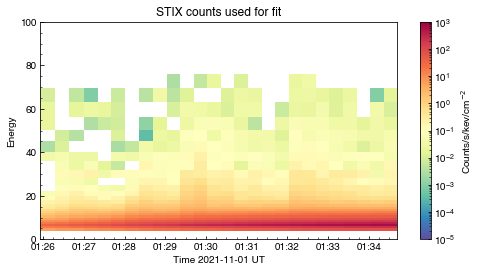

In [974]:
fig, ax = plt.subplots(figsize=(8, 4))
im = plt.pcolormesh(stix_mid_times_dt, 
               stix_mid_ens, 
               stix_ct_flux.T, 
               norm=colors.LogNorm(vmin=1e-5, vmax=1e3), 
               cmap="Spectral_r")
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
#ax.set_yscale("log")
ax.set_ylim(0, 100)
ax.set_ylabel("Energy")
ax.set_xlabel("Time {:s} UT".format(stix_mid_times_dt[0].strftime("%Y-%m-%d")))
fig.colorbar(im, label="Counts/s/kev/cm$^{-2}$")
ax.set_title("STIX counts used for fit")

In [975]:
stix_inds_615 = np.where((stix_eedges[:, 0]>=6)&(stix_eedges[:, 1]<=15))[0]
stix_inds_1525 = np.where((stix_eedges[:, 0]>=15)&(stix_eedges[:, 1]<=25))[0]
stix_inds_2545 = np.where((stix_eedges[:, 0]>=25)&(stix_eedges[:, 1]<=45))[0]

Text(0.5, 0, 'Time')

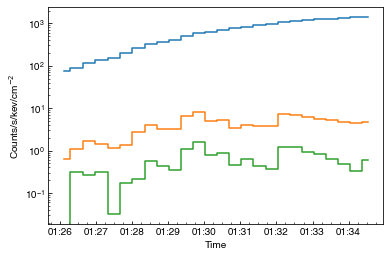

In [976]:
fig, ax = plt.subplots()
plt.plot(stix_mid_times_dt, 
         np.sum(stix_ct_flux[:, stix_inds_615], axis=1), 
         drawstyle="steps-mid")
plt.plot(stix_mid_times_dt, 
         np.sum(stix_ct_flux[:, stix_inds_1525], axis=1), 
         drawstyle="steps-mid")
plt.plot(stix_mid_times_dt, 
         np.sum(stix_ct_flux[:, stix_inds_2545], axis=1), 
         drawstyle="steps-mid")
ax.set_yscale("log")
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
ax.set_ylabel("Counts/s/kev/cm$^{-2}$")
ax.set_xlabel("Time")

Text(0, 0.5, 'Count flux (20-45 keV)')

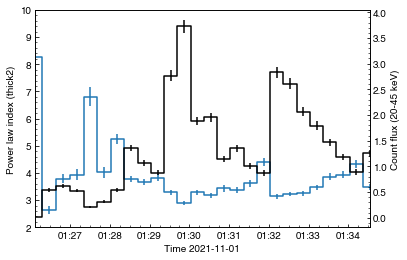

In [977]:
stix_inds_2045 = np.where((stix_eedges[:, 0]>=20)&(stix_eedges[:, 1]<=45))[0]

fig, ax = plt.subplots()
if stix_fit_name == "vth+thick2":
    ax.errorbar(stix_mid_times_dt, stix_fit_params[:, 4], stix_fit_params_err[:, 4],
                drawstyle="steps-mid")
elif stix_fit_name == "1pow":
    ax.errorbar(stix_mid_times_dt, stix_fit_params[:, 1], stix_fit_params_err[:, 1],
                drawstyle="steps-mid")
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
ax.set_xlim(stix_mid_times_dt[0], stix_mid_times_dt[-1])
ax.set_ylim(2, 10)

ax2 = ax.twinx()
errors = stix_ct_flux_err[:, stix_inds_2045]
err = np.sqrt(np.sum(errors**2, axis=1))
ax2.errorbar(stix_mid_times_dt, np.sum(stix_ct_flux[:, stix_inds_2045], axis=1),
          err,
          drawstyle="steps-mid", color='k')

ax.set_ylabel("Power law index (thick2)")
ax.set_xlabel("Time {:s}".format(stix_mid_times_dt[0].strftime("%Y-%m-%d")))
ax2.set_ylabel("Count flux (20-45 keV)")

## Plot the resulting data

In [978]:
fermi_mid_energies = np.average(fermi_eedges, axis=1)
fermi_en_inds = np.where(fermi_mid_energies<100)[0]

In [979]:
fermi_pred.shape

(26, 128)

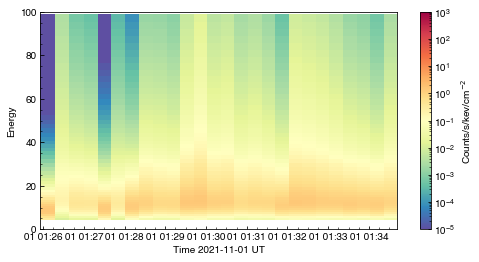

In [980]:
fig, ax = plt.subplots(figsize=(8, 4))
im = ax.pcolormesh(stix_mid_times_dt, fermi_mid_energies[fermi_en_inds], 
              fermi_pred[:, fermi_en_inds].T,
              norm=colors.LogNorm(vmin=1e-5, vmax=1e3), 
              cmap="Spectral_r")
ax.set_ylim(0, 100)
ax.set_ylabel("Energy")
ax.set_xlabel("Time {:s} UT".format(stix_mid_times_dt[0].strftime("%Y-%m-%d")))
fig.colorbar(im, label="Counts/s/kev/cm$^{-2}$")

## Need to background subtract the FERMI/GBM data

In [981]:
fermi_time_array = np.average(fermi_tedges, axis=1)
fermi_time_dt = parse_time(fermi_time_array, format="utime").datetime

In [982]:
fermi_time_dt[0]

datetime.datetime(2021, 10, 31, 23, 59, 55, 799138)

In [983]:
t1 = parse_time("2021-11-01 00:00").utime
t2 = parse_time("2021-11-01 02:00").utime

In [984]:
t_inds_fermi = np.where((fermi_tedges[:, 0]>=t1)&(fermi_tedges[:, 1]<=t2))[0]

In [985]:
ind_100300 = np.where((fermi_eedges[:, 0]>100)&(fermi_eedges[:, 1]<=300))[0]
ind_50100 = np.where((fermi_eedges[:, 0]>50)&(fermi_eedges[:, 1]<=100))[0]
ind_2550 = np.where((fermi_eedges[:, 0]>25)&(fermi_eedges[:, 1]<=50))[0]
ind_1525 = np.where((fermi_eedges[:, 0]>15)&(fermi_eedges[:, 1]<=25))[0]
ind_1015 = np.where((fermi_eedges[:, 0]>10)&(fermi_eedges[:, 1]<=15))[0]

fermi_100300 = np.sum(fermi_data[:, ind_100300], axis=1)
fermi_50100 = np.sum(fermi_data[:, ind_50100], axis=1)
fermi_2550 = np.sum(fermi_data[:, ind_2550], axis=1)
fermi_1525 = np.sum(fermi_data[:, ind_1525], axis=1)
fermi_1015 = np.sum(fermi_data[:, ind_1015], axis=1)

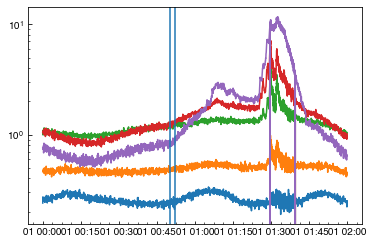

In [986]:
fig, ax = plt.subplots()
ax.plot(fermi_time_dt[t_inds_fermi], fermi_100300[t_inds_fermi])
ax.plot(fermi_time_dt[t_inds_fermi], fermi_50100[t_inds_fermi])
ax.plot(fermi_time_dt[t_inds_fermi], fermi_2550[t_inds_fermi])
ax.plot(fermi_time_dt[t_inds_fermi], fermi_1525[t_inds_fermi])
ax.plot(fermi_time_dt[t_inds_fermi], fermi_1015[t_inds_fermi])

plt.axvline(parse_time("2021-11-01 00:50").datetime)
plt.axvline(parse_time("2021-11-01 00:52").datetime)
plt.yscale("log")

In [987]:
bg_1 = parse_time("2021-11-01 01:19:37.962").utime
bg_2 = parse_time("2021-11-01 01:20:18.922").utime
bg_inds = np.where((fermi_tedges[:, 0]>=bg_1)&(fermi_tedges[:, 1]<=bg_2))[0]

In [988]:
bg_fermi = np.mean(fermi_data[bg_inds, :], axis=0)

In [989]:
fermi_bg_sub = (fermi_data - bg_fermi)

In [990]:
fermi_bg_50100 = np.sum(fermi_bg_sub[:, ind_50100], axis=1)

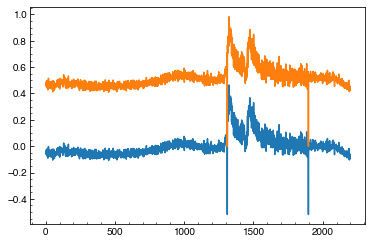

In [991]:
plt.plot(fermi_bg_50100[t_inds_fermi])
plt.plot(fermi_50100[t_inds_fermi])

## Lets look at the predicted 20-28 keV

First lets resample FERMI to the STIX data bins used for fitting

In [992]:
resampled_fermi = []
for i in range(len(stix_fit_tedges)):
    t_inds = np.where((fermi_tedges[:, 0]>=stix_fit_tedges[i, 0])&(fermi_tedges[:, 1]<=stix_fit_tedges[i, 1]))[0]
    av_data = np.mean(fermi_bg_sub[t_inds, :], axis=0)
    resampled_fermi.append(av_data)

resampled_fermi = np.array(resampled_fermi)

In [993]:
ind_2028 = np.where((fermi_eedges[:, 0]>=20)&(fermi_eedges[:, 1]<=28))[0]

In [994]:
fermi_pred_2028 = np.sum(fermi_pred[:, ind_2028], axis=1)
fermi_real_2028 = np.sum(resampled_fermi[:, ind_2028], axis=1)

(18932.059797060185, 18932.065647175925)

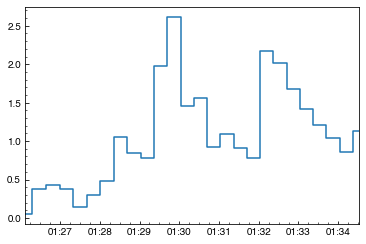

In [995]:
fig, ax = plt.subplots()
ax.plot(stix_mid_times_dt, fermi_pred_2028, 
            drawstyle="steps-mid")
ax.xaxis.set_major_formatter(dates.DateFormatter("%H:%M"))
ax.set_xlim(stix_mid_times_dt[0], stix_mid_times_dt[-1])

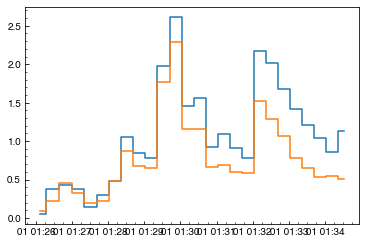

In [996]:
fig, ax = plt.subplots()
ax.plot(stix_mid_times_dt, fermi_pred_2028, 
            drawstyle="steps-mid", label="estimated Fermi counts")
ax.plot(stix_mid_times_dt, fermi_real_2028, 
        drawstyle="steps-mid", label="observed Fermi counts")

Text(0, 0.5, 'Observed Fermi/GBM counts (20-28 keV)')

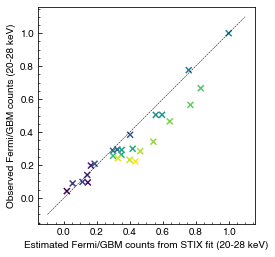

In [997]:
fig, ax = plt.subplots()
ax.scatter(fermi_pred_2028/fermi_pred_2028.max(), fermi_real_2028/fermi_real_2028.max(), 
        marker='x', c=stix_mid_times-stix_mid_times[0])
ax.set_aspect('equal', adjustable='box')
plt.plot([-0.1, 1.1], [-0.1, 1.1], color='k', ls='dashed', lw=0.5)
ax.set_xlabel("Estimated Fermi/GBM counts from STIX fit (20-28 keV)")
ax.set_ylabel("Observed Fermi/GBM counts (20-28 keV)")

## Lets now look at directivity

In [998]:
ind_1845 = np.where((fermi_eedges[:, 0]>=18)&(fermi_eedges[:, 1]<=45))[0]
fermi_pred_1845 = np.sum(fermi_pred[:, ind_1845], axis=1)
fermi_real_1845 = np.sum(resampled_fermi[:, ind_1845], axis=1)

In [1020]:
i_s, i_e = 10, 12

In [1021]:
print(stix_mid_times_dt[i_s])
print(stix_mid_times_dt[i_e])

2021-11-01 01:29:31.916000
2021-11-01 01:30:11.916000


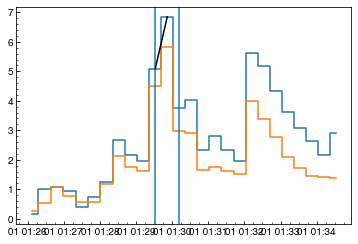

In [1022]:
fig, ax = plt.subplots()
ax.plot(stix_mid_times_dt, fermi_pred_1845, drawstyle="steps-mid")
ax.plot(stix_mid_times_dt, fermi_real_1845, drawstyle="steps-mid")
plt.axvline(stix_mid_times_dt[i_s])
plt.axvline(stix_mid_times_dt[i_e])

plt.plot(stix_mid_times_dt[i_s:i_e], np.sum(fermi_pred[i_s:i_e, ind_1845], axis=1), color='k')

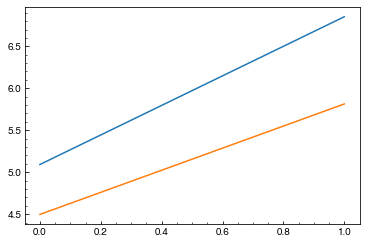

In [1023]:
plt.plot(np.sum(fermi_pred[i_s:i_e, ind_1845], axis=1))
plt.plot(np.sum(resampled_fermi[i_s:i_e, ind_1845], axis=1))

In [1024]:
erange = np.where((fermi_eedges[:, 0]>=18)&(fermi_eedges[:, 1]<=50))[0]
erange.shape

(18,)

In [1025]:
f_obs = np.mean(resampled_fermi[i_s:i_e, erange], axis=0)
f_pred = np.mean(fermi_pred[i_s:i_e, erange], axis=0)

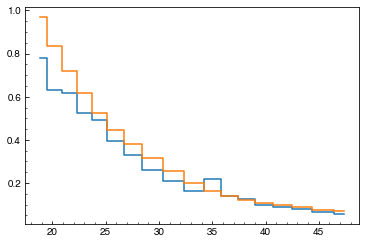

In [1026]:
plt.plot(fermi_mid_energies[erange], f_obs, drawstyle="steps-mid")
plt.plot(fermi_mid_energies[erange], f_pred, drawstyle="steps-mid")

In [1027]:
f_obs.shape

(18,)

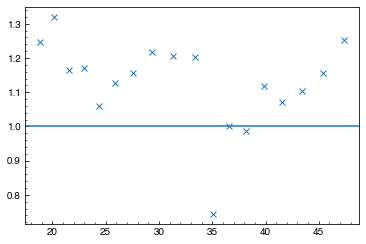

In [1028]:
plt.plot(fermi_mid_energies[erange], f_pred/f_obs, marker='x', ls='')
plt.axhline(1)